In [7]:
import numpy as np

from keras import models
from keras import layers 

from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical

In [11]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_news = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
print (decoded_review)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
def vectorize_sequences (sequences, dim = 10000):
  results = np.zeros((len(sequences), dim))
  for i, seq in enumerate (sequences):
    results[i, seq] = 1
  return results


In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences (test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2990      
Total params: 659,630
Trainable params: 659,630
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 256,
                    validation_data = (x_val, y_val)
                    )

Epoch 1/20
32/32 [==============================] - 2s 35ms/step - loss: 2.7377 - accuracy: 0.4396 - val_loss: 1.3549 - val_accuracy: 0.6820
Epoch 2/20
32/32 [==============================] - 1s 29ms/step - loss: 1.1894 - accuracy: 0.7254 - val_loss: 1.1755 - val_accuracy: 0.7190
Epoch 3/20
32/32 [==============================] - 1s 29ms/step - loss: 0.8395 - accuracy: 0.8065 - val_loss: 0.9920 - val_accuracy: 0.7780
Epoch 4/20
32/32 [==============================] - 1s 30ms/step - loss: 0.5888 - accuracy: 0.8752 - val_loss: 0.9605 - val_accuracy: 0.7940
Epoch 5/20
32/32 [==============================] - 1s 28ms/step - loss: 0.4197 - accuracy: 0.9092 - val_loss: 0.9164 - val_accuracy: 0.8020
Epoch 6/20
32/32 [==============================] - 1s 29ms/step - loss: 0.3261 - accuracy: 0.9253 - val_loss: 0.9811 - val_accuracy: 0.7980
Epoch 7/20
32/32 [==============================] - 1s 29ms/step - loss: 0.2306 - accuracy: 0.9472 - val_loss: 0.9878 - val_accuracy: 0.7970
Epoch 8/20
32

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

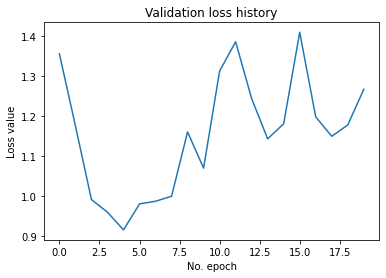

In [34]:
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

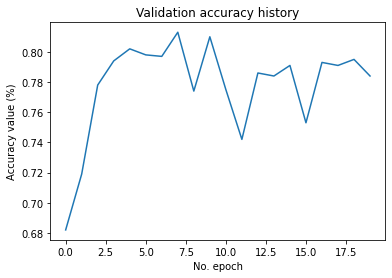

In [35]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [36]:
results = model.evaluate(x_test, y_test)


71/71 [==============================] - 0s 3ms/step - loss: 1.5502 - accuracy: 0.7760
